# Exercise 7-4: Polynomial Regression Demo

## Step 1: Problem Analysis and Framing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as sm

## Step 2: Data Preperation

In [2]:
# import the dataset
df = pd.read_csv('./salaries.csv')

In [3]:
df.shape

(10, 3)

In [4]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


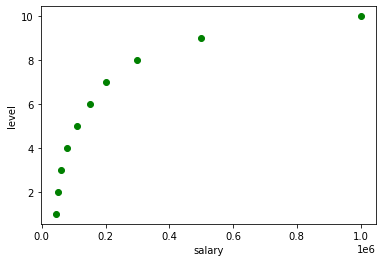

In [5]:
# Plot all
plt.ylabel('level')
plt.xlabel('salary')
plt.scatter(df.Salary, df.Level, color='green')
plt.show()

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Level', ylabel='Density'>

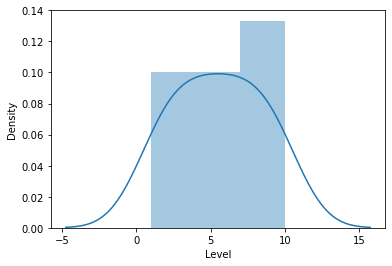

In [6]:
sns.distplot(df['Level'], label='level', norm_hist=True)

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

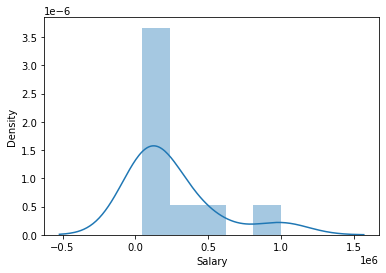

In [7]:
sns.distplot(df['Salary'], label='salary', norm_hist=True)

In [8]:
# check the coorelation
corr_matrix = df.corr()
corr_matrix

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


## Step 3: Train a Model

In [9]:
# split x and y
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [10]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [11]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [12]:
# Split into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Linear Regression First

In [13]:
# creating Linear Regression model
linreg = LinearRegression()

# Fitting the model to our data
linreg.fit(X,y)

LinearRegression()

In [14]:
y_predicted = linreg.predict(X)
y_predicted

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [15]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

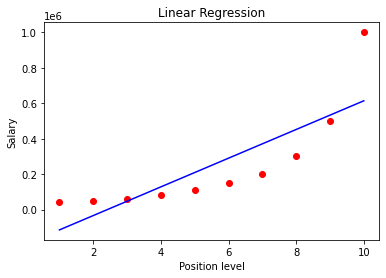

In [16]:
# Visualise the Linear Regression
plt.title('Linear Regression')
plt.scatter(X, y, color='red')
plt.plot(X, y_predicted, color='blue')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Polynomial Regression

In [17]:
# Polynomial regression model
polyreg = PolynomialFeatures(degree=4)

# Transform my train data to adjust the polynom to linear regression model
X_pol = polyreg.fit_transform(X)

In [18]:
# Create linear regression model
pollinreg = LinearRegression()
pollinreg.fit(X_pol, y)

LinearRegression()

In [19]:
# Apply the model on my train data
y_predicted = pollinreg.predict(X_pol)

In [20]:
y_predicted

array([ 53356.64335683,  31759.90675992,  58642.19114218,  94632.86713289,
       121724.941725  , 143275.05827513, 184003.49650353, 289994.17249412,
       528694.6386945 , 988916.0839159 ])

In [21]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

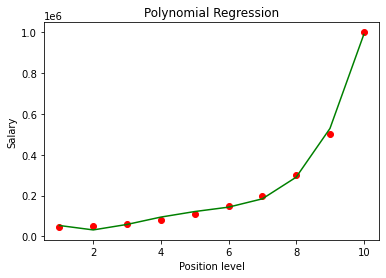

In [22]:
# Visualise the Polynomial Regression results
plt.title('Polynomial Regression')
plt.scatter(X, y, color='red')
plt.plot(X, y_predicted, color='green')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [23]:
print("Multiople Regression Preformance")

# The coefficients
print('Coefficient: ', pollinreg.coef_)
print('Intercept: ', pollinreg.intercept_)

Multiople Regression Preformance
Coefficient:  [      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]
Intercept:  184166.66666727327


## Step 4: Test and Compare the Models

In [24]:
# Predicting a new result with Linear Regression
linreg.predict([[5.5]])
# Output should be 249500

array([249500.])

In [32]:
# One more
linreg.predict([[8.0]])

array([451696.96969697])

In [26]:
# Predicting the same with Polymonial Regression
pollinreg.predict(polyreg.fit_transform([[5.5]]))

array([132148.43750007])

In [27]:
pollinreg.predict(polyreg.fit_transform([[8]]))

array([289994.17249412])

## Step 5: Assess the Model

In [28]:
# RMSE (Root mean squared error) answer the question: "How similar, on average, are the numbers in list1 to list2"
rmse = np.sqrt(sm.mean_squared_error(y, y_predicted))
r2 = sm.r2_score(y, y_predicted)

In [29]:
rmse

14503.234909626897

In [30]:
r2

0.9973922891706614